This notebook produces the "*Gold sample*" of binary-star systems with unimodal samplings

In [1]:
# Standard library
import os
import pathlib

# Third-party
import astropy.units as u
import astropy.table as at
from astropy.time import Time
import h5py
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm.auto import tqdm
import thejoker as tj
from thejoker.multiproc_helpers import batch_tasks

# Project
from hq.config import Config

In [2]:
conf = Config('../../hq-config/config.yml')

In [3]:
meta = at.QTable.read(conf.metadata_file)
allstar = at.QTable.read(
    '/mnt/home/apricewhelan/data/APOGEE_DR17/allStar-dr17-synspec.fits', 
    hdu=1
)
meta = at.join(meta, allstar, keys='APOGEE_ID')
meta = at.unique(meta, keys='APOGEE_ID')

Choices to remove obvious failures (and very low log*g* primary stars):

In [4]:
mask = (
    (meta['n_visits'] > 5) &
    (meta['mcmc_status'] <= 2) & 
    (meta['mcmc_completed']) &
    (meta['LOGG'] > 1) &
    (meta['phase_coverage'] > 0.25) &
    (meta['max_phase_gap'] < 0.5)
)
gold = meta[mask]
mask.sum()

2255

(-0.02, 1.02)

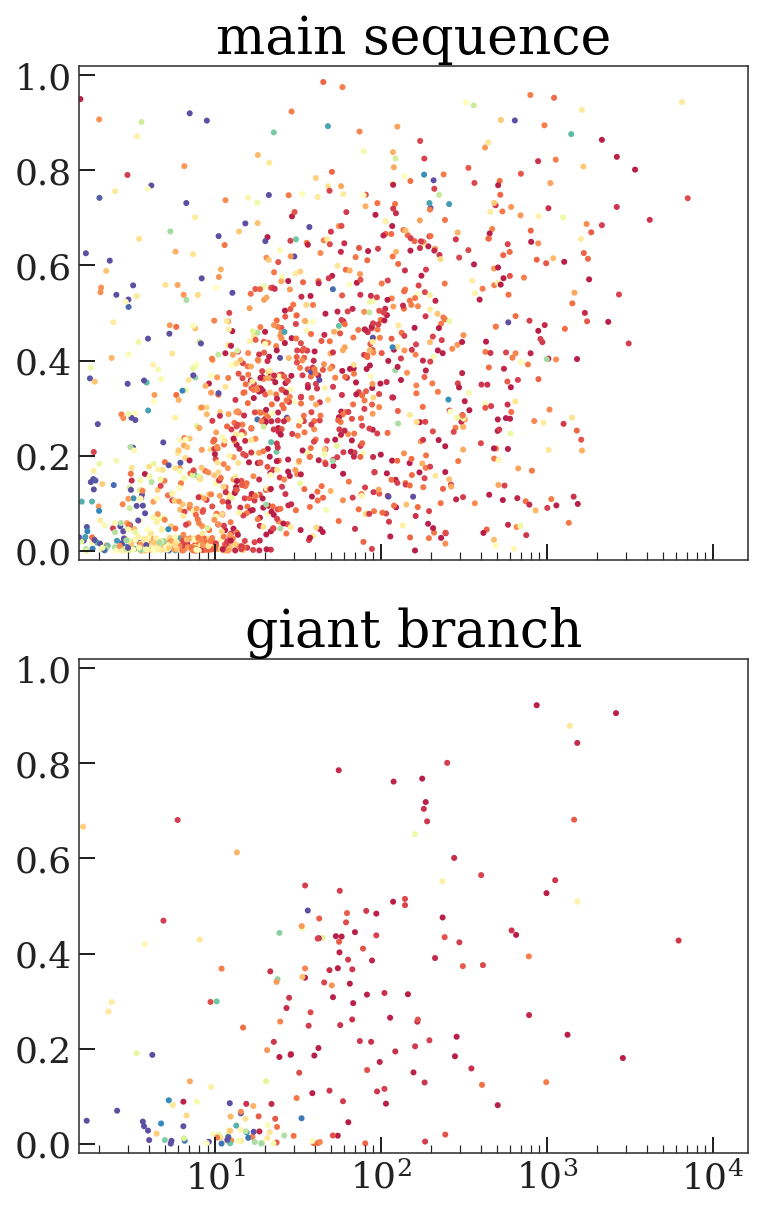

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10), 
                         sharex=True, sharey=True)

for ax, _mask, title in zip(axes, 
                            [gold['LOGG'] > 3.6, gold['LOGG'] <= 3.6],
                            ['main sequence', 'giant branch']):
    
    ax.scatter(gold['MAP_P'][_mask], 
               gold['MAP_e'][_mask],
               c=gold['VSINI'][_mask], 
               cmap='Spectral',
               s=4,
               vmin=0, vmax=30)
    
    ax.set_title(title)

ax.set_xscale('log')

ax.set_xlim(1.5, 16384)
ax.set_ylim(-0.02, 1.02)

In [7]:
gold.write('../../catalogs/gold-sample.fits', overwrite=True)